In [3]:
# Step 1: Load & initial exploration
import pandas as pd
import numpy as np

# 1) Load (adjust path if needed)
path = "/content/Spotify_data.xlsx"   # <- change if your file is at a different path
df = pd.read_excel(path)

# 2) Quick peek
print("Shape:", df.shape)
display(df.head(10))

# 3) Column list and dtypes
print("\nColumns and dtypes:")
print(df.dtypes)

# 4) Missing values (count and percent)
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_counts, "missing_pct": missing_percent})
display(missing_df.sort_values("missing_count", ascending=False).head(50))

# 5) Duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

# 6) Numeric summary and categorical value counts
print("\nNumeric summary:")
display(df.describe(include=[np.number]).T)

print("\nCategorical columns (top 10 value counts each):")
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols:
    print(f"\n--- {c} ---")
    print(df[c].value_counts(dropna=False).head(10))

# 7) Try to detect a churn/target column by common names
possible_targets = [c for c in df.columns if c.lower() in ("churn", "is_churn", "churned", "label", "target", "cancelled", "cancelled_flag")]
print("\nPossible target columns found:", possible_targets)

# 8) Save a short EDA summary for reference
eda_summary = {
    "n_rows": df.shape[0],
    "n_cols": df.shape[1],
    "duplicates": int(dup_count),
    "missing_overview": missing_df.to_dict(),
    "columns": df.dtypes.astype(str).to_dict()
}
# if you want to write it out:
import json
with open("eda_summary.json", "w") as f:
    json.dump(eda_summary, f, indent=2)

print("\nEDA summary saved as eda_summary.json in the working directory.")

Shape: (520, 20)


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
5,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Pop,Night,Uplifting and motivational,Workout session,Others,3,Never,NaN,NaN,NaN,NaN,Ok
6,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Morning,Relaxation and stress relief,Office hours,recommendations,3,Never,NaN,NaN,NaN,NaN,Ok
7,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Social gatherings or parties,leisure time,recommendations,5,Several times a week,Lifestyle and Health,Conversational,Both,Longer,Satisfied
8,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Music,Melody,Afternoon,"Relaxation and stress relief, Uplifting and mo...","While Traveling, leisure time","Playlists, Radio",4,Rarely,Comedy,Story telling,Well known individuals,Shorter,Satisfied
9,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Never,NaN,NaN,NaN,NaN,Ok



Columns and dtypes:
Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object


,missing_count,missing_pct
preffered_premium_plan,208,40.00
fav_pod_genre,148,28.46
pod_host_preference,141,27.12
preffered_pod_format,140,26.92
preffered_pod_duration,129,24.81
spotify_usage_period,0,0.00
Gender,0,0.00
Age,0,0.00
spotify_listening_device,0,0.00
spotify_subscription_plan,0,0.00



Duplicate rows: 1

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
music_recc_rating,520.0,3.503846,0.979552,1.0,3.0,3.5,4.0,5.0



Categorical columns (top 10 value counts each):

--- Age ---
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64

--- Gender ---
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64

--- spotify_usage_period ---
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64

--- spotify_listening_device ---
spotify_listening_device
Smartphone                                                                              300
Computer or laptop                                                                       54
Smartphone, Computer or laptop                                                           48
Smart speakers or voice assistants                                                       43
Computer or laptop, Smart speakers or voice assistants                                   14
Smartphone, Smart speakers or voice assistants      

In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel("/content/Spotify_data.xlsx")

# -------------------------------
# STEP 3.1 — Create Target Column
# -------------------------------

# Convert willingness responses into binary target
df['premium_sub_willingness'] = df['premium_sub_willingness'].str.strip().str.lower()

df['target'] = df['premium_sub_willingness'].map({
    'yes': 0,          # Will take premium → Not churn
    'no': 1,           # Will NOT take premium → churn
    'maybe': 1,
    'not sure': 1,
    'unsure': 1
})

print("Unique values after mapping:", df['target'].unique())


# -------------------------------
# STEP 3.2 — Drop Original Target Column
# -------------------------------
df = df.drop(columns=['premium_sub_willingness'])

# -------------------------------
# STEP 3.3 — Fix Age (currently object)
# -------------------------------
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str):
        if '-' in age_str:
            low, high = map(int, age_str.split('-'))
            return (low + high) / 2
        elif '+' in age_str:
            return int(age_str.replace('+', ''))
    return age_str

df['Age'] = df['Age'].apply(convert_age_to_numeric)
# Ensure all ages are numeric, coercing any remaining errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)

# -------------------------------
# STEP 3.4 — Fill Missing Values (if any)
# -------------------------------
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# -------------------------------
# STEP 3.5 — Encode Categorical Columns
# -------------------------------
cat_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)


# -------------------------------
# STEP 3.6 — Save Clean Dataset
# -------------------------------
df_encoded.to_csv("spotify_cleaned.csv", index=False)
print("Saved cleaned file: spotify_cleaned.csv")

Unique values after mapping: [0 1]
Shape after encoding: (520, 139)
Saved cleaned file: spotify_cleaned.csv


/tmp/ipython-input-1815182811.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1815182811.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Loaded shape: (520, 139)
Train shape: (416, 138) Test shape: (104, 138)
Target distribution (train): [0.35817308 0.64182692]
Target distribution (test): [0.35576923 0.64423077]

=== Logistic Regression ===
Accuracy: 0.5962
Precision: 0.7273
Recall: 0.5970
F1-score: 0.6557
ROC-AUC: 0.6357
Confusion Matrix:
 [[22 15]
 [27 40]]

=== Random Forest ===
Accuracy: 0.7212
Precision: 0.7794
Recall: 0.7910
F1-score: 0.7852
ROC-AUC: 0.7469
Confusion Matrix:
 [[22 15]
 [14 53]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:35:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
Accuracy: 0.6346
Precision: 0.7458
Recall: 0.6567
F1-score: 0.6984
ROC-AUC: 0.7079
Confusion Matrix:
 [[22 15]
 [23 44]]


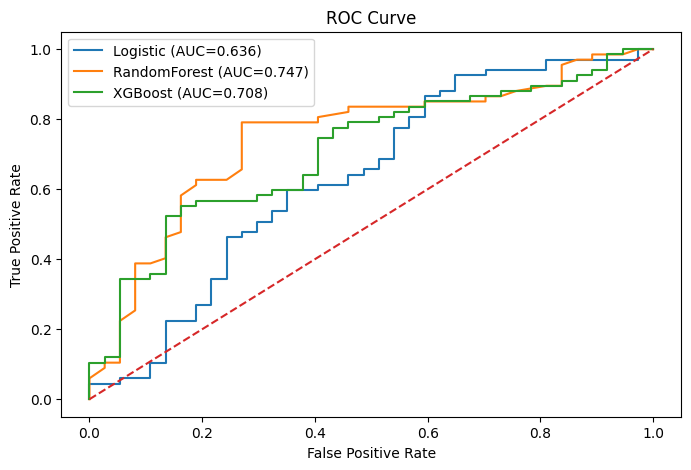

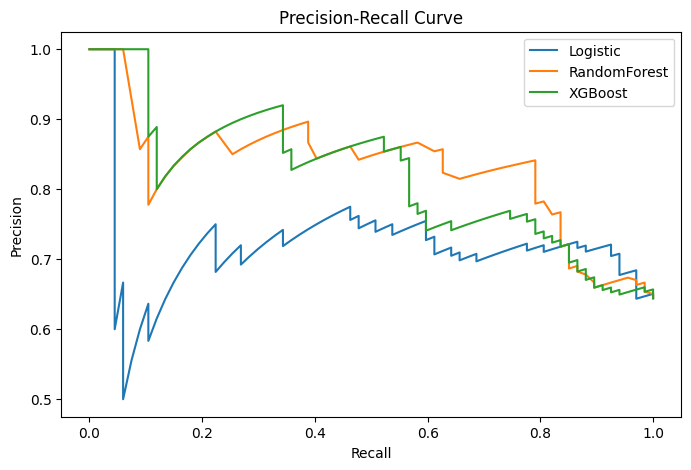


Top logistic features:


,feature,coef,abs_coef
21,spotify_subscription_plan_Premium (paid subscr...,-0.990386,0.990386
23,preffered_premium_plan_Individual Plan- Rs 119...,0.877052,0.877052
57,"music_lis_frequency_Office hours, Study Hours,...",0.708035,0.708035
103,"music_expl_method_recommendations, Radio, Others",-0.684937,0.684937
50,music_Influencial_mood_Uplifting and motivatio...,-0.647648,0.647648
85,music_lis_frequency_leisure time,0.642267,0.642267
92,"music_expl_method_Playlists, Radio, Others",-0.586265,0.586265
127,preffered_pod_format_Educational,-0.536934,0.536934
45,music_Influencial_mood_Sadness or melancholy,-0.534303,0.534303
136,pod_variety_satisfaction_Very Dissatisfied,0.527838,0.527838



Top Random Forest features:


,feature,importance
21,spotify_subscription_plan_Premium (paid subscr...,0.073335
23,preffered_premium_plan_Individual Plan- Rs 119...,0.044371
1,music_recc_rating,0.040906
45,music_Influencial_mood_Sadness or melancholy,0.026124
133,preffered_pod_duration_Shorter,0.023803
25,preferred_listening_content_Podcast,0.022199
134,pod_variety_satisfaction_Ok,0.021222
109,fav_pod_genre_Comedy,0.020622
12,spotify_listening_device_Smartphone,0.020165
5,spotify_usage_period_Less than 6 months,0.019491



Top XGBoost features:


,feature,importance
21,spotify_subscription_plan_Premium (paid subscr...,0.099813
23,preffered_premium_plan_Individual Plan- Rs 119...,0.065949
24,preffered_premium_plan_Student Plan-Rs 59/month,0.038585
42,music_Influencial_mood_Relaxation and stress r...,0.036370
73,"music_lis_frequency_Study Hours, While Traveli...",0.035808
132,preffered_pod_duration_Longer,0.028622
127,preffered_pod_format_Educational,0.025078
22,preffered_premium_plan_Family Plan-Rs 179/month,0.024340
4,spotify_usage_period_6 months to 1 year,0.022859
85,music_lis_frequency_leisure time,0.022480



ROC-AUC summary: {'Logistic': np.float64(0.63574021782977), 'RandomForest': np.float64(0.7468737394110527), 'XGBoost': np.float64(0.7079467527228721)}
Best model by ROC-AUC: RandomForest
Saved best model as best_model_RandomForest.pkl
Saved test_set_predictions.csv with probabilities
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params (XGBoost grid): {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV ROC-AUC: 0.791873423526714


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:35:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['xgb_best_grid.pkl']

In [5]:
# Step 4: Train/Test split, modeling (Logistic Regression, RandomForest, XGBoost), evaluation
# Run in Colab / Jupyter. Installs are included for XGBoost if not present.

# 0) Install required package (uncomment if missing)
# !pip install xgboost --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# --------------------------
# 1) Load cleaned dataset
# --------------------------
df = pd.read_csv("spotify_cleaned.csv")   # file saved in Step 3
print("Loaded shape:", df.shape)
# Ensure target column exists
if 'target' not in df.columns:
    raise ValueError("No 'target' column found. Run Step 3 to create the target first.")

# Separate X and y
X = df.drop(columns=['target'])
y = df['target'].astype(int)

# Keep an index or ID column if available (optional)
# If you have a CustomerID column, include it before encoding in Step 3 and keep it here.
index_col = df.index  # fallback index to attach predictions later

# --------------------------
# 2) Train / Test Split
# --------------------------
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, index_col, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Target distribution (train):", np.bincount(y_train) / len(y_train))
print("Target distribution (test):", np.bincount(y_test) / len(y_test))

# --------------------------
# 3) Scaling (for Logistic)
# --------------------------
# Create copies for each model (trees don't need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for future use
joblib.dump(scaler, "scaler.pkl")

# --------------------------
# 4) Helper function: evaluate a model
# --------------------------
def evaluate_model(name, model, X_t, X_val, y_t, y_val, proba=True):
    model.fit(X_t, y_t)
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:, 1] if proba else None

    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds, zero_division=0)
    rec = recall_score(y_val, preds, zero_division=0)
    f1 = f1_score(y_val, preds, zero_division=0)
    roc = roc_auc_score(y_val, probs) if proba else None
    cm = confusion_matrix(y_val, preds)

    print(f"\n=== {name} ===")
    print("Accuracy: {:.4f}".format(acc))
    print("Precision: {:.4f}".format(prec))
    print("Recall: {:.4f}".format(rec))
    print("F1-score: {:.4f}".format(f1))
    if roc is not None:
        print("ROC-AUC: {:.4f}".format(roc))
    print("Confusion Matrix:\n", cm)
    return {"model": model, "preds": preds, "probs": probs, "metrics": (acc,prec,rec,f1,roc), "cm": cm}

# --------------------------
# 5) Train baseline models
# --------------------------

# 5.1 Logistic Regression (with balanced class weight)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear', random_state=42)
res_lr = evaluate_model("Logistic Regression", lr, X_train_scaled, X_test_scaled, y_train, y_test)

# 5.2 Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', n_jobs=-1)
res_rf = evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)

# 5.3 XGBoost
# set scale_pos_weight to balance classes: (neg/pos)
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos if pos > 0 else 1.0

xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)
res_xgb = evaluate_model("XGBoost", xgb_clf, X_train, X_test, y_train, y_test)

# --------------------------
# 6) Compare Models: ROC curve and Precision-Recall curve
# --------------------------
plt.figure(figsize=(8,5))
# ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, res_lr['probs'])
fpr_rf, tpr_rf, _ = roc_curve(y_test, res_rf['probs'])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, res_xgb['probs'])
plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC={res_lr['metrics'][4]:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC={res_rf['metrics'][4]:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={res_xgb['metrics'][4]:.3f})")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
prec_lr, rec_lr, _ = precision_recall_curve(y_test, res_lr['probs'])
prec_rf, rec_rf, _ = precision_recall_curve(y_test, res_rf['probs'])
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, res_xgb['probs'])
plt.plot(rec_lr, prec_lr, label="Logistic")
plt.plot(rec_rf, prec_rf, label="RandomForest")
plt.plot(rec_xgb, prec_xgb, label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# --------------------------
# 7) Feature importance / coefficients
# --------------------------
feature_names = X.columns.tolist()

# Logistic coefficients (if scaled)
coeffs = lr.coef_.ravel()
feat_lr = pd.DataFrame({"feature": feature_names, "coef": coeffs})
feat_lr['abs_coef'] = feat_lr['coef'].abs()
feat_lr = feat_lr.sort_values("abs_coef", ascending=False).head(20)
print("\nTop logistic features:")
display(feat_lr.head(20))

# Random Forest importances
importances_rf = rf.feature_importances_
feat_rf = pd.DataFrame({"feature": feature_names, "importance": importances_rf}).sort_values("importance", ascending=False).head(20)
print("\nTop Random Forest features:")
display(feat_rf)

# XGBoost importances
importances_xgb = xgb_clf.feature_importances_
feat_xgb = pd.DataFrame({"feature": feature_names, "importance": importances_xgb}).sort_values("importance", ascending=False).head(20)
print("\nTop XGBoost features:")
display(feat_xgb)

# --------------------------
# 8) Save best model (choose by ROC-AUC here)
# --------------------------
# Collect ROC-AUCs
roc_dict = {
    "Logistic": res_lr['metrics'][4],
    "RandomForest": res_rf['metrics'][4],
    "XGBoost": res_xgb['metrics'][4]
}
print("\nROC-AUC summary:", roc_dict)
best_model_name = max(roc_dict, key=lambda k: (roc_dict[k] if roc_dict[k] is not None else -1))
print("Best model by ROC-AUC:", best_model_name)

best_model = {'Logistic': lr, 'RandomForest': rf, 'XGBoost': xgb_clf}[best_model_name]
joblib.dump(best_model, f"best_model_{best_model_name}.pkl")
print(f"Saved best model as best_model_{best_model_name}.pkl")

# --------------------------
# 9) Export predictions with probabilities on test set
# --------------------------
pred_df = pd.DataFrame({
    "index": np.array(idx_test),
    "true": y_test.values,
    "pred": (res_xgb['probs'] >= 0.5).astype(int),   # using xgboost preds as example
    "prob": res_xgb['probs']
})

# If best model is not XGBoost, override pred/prob using best model:
if best_model_name == "Logistic":
    pred_probs = lr.predict_proba(X_test_scaled)[:,1]
    pred_df['prob'] = pred_probs
    pred_df['pred'] = (pred_probs >= 0.5).astype(int)
elif best_model_name == "RandomForest":
    pred_probs = rf.predict_proba(X_test)[:,1]
    pred_df['prob'] = pred_probs
    pred_df['pred'] = (pred_probs >= 0.5).astype(int)
else:
    # already res_xgb used above
    pass

pred_df.to_csv("test_set_predictions.csv", index=False)
print("Saved test_set_predictions.csv with probabilities")

# --------------------------
# 10) (Optional) Simple hyperparameter tuning example for XGBoost
# --------------------------
# Small grid search for n_estimators and max_depth -- keep small to save time
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1]
}
xgb_search = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1
)
xgb_search.fit(X_train, y_train)
print("Best params (XGBoost grid):", xgb_search.best_params_)
print("Best CV ROC-AUC:", xgb_search.best_score_)
joblib.dump(xgb_search.best_estimator_, "xgb_best_grid.pkl")


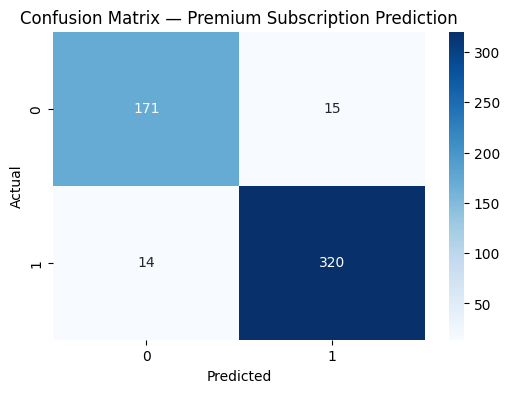


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       186
           1       0.96      0.96      0.96       334

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



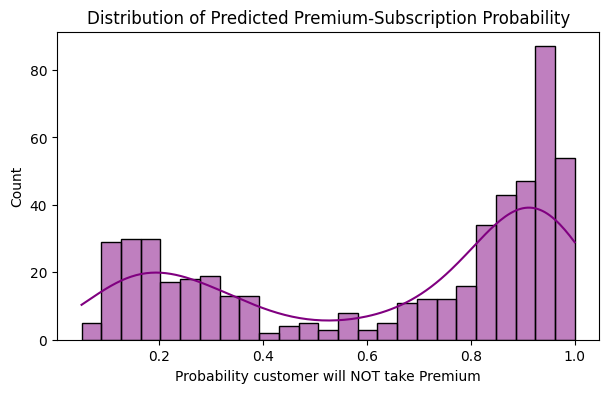

/tmp/ipython-input-1842102694.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feat_imp, palette="viridis")


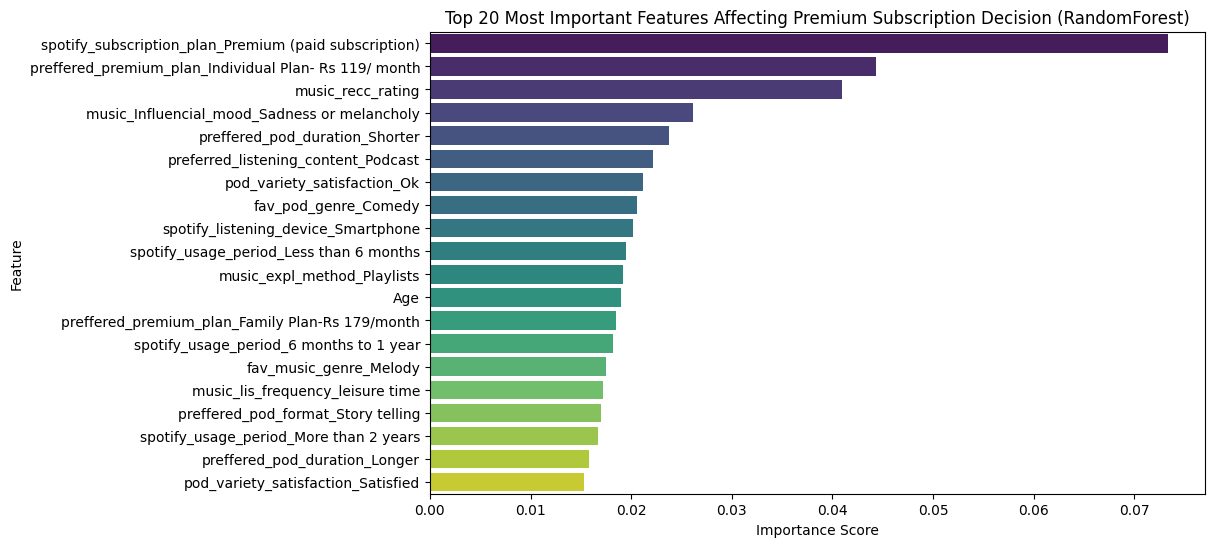


Saved feature importance table as feature_importance_top20.csv


In [6]:
# STEP 5: Visualizations & Business Insights (Using XGBoost)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, classification_report

# Load cleaned dataset
df = pd.read_csv("spotify_cleaned.csv")

X = df.drop(columns=['target'])
y = df['target']

# Load best model
# The previous step saved the best model based on ROC-AUC.
# The variable `best_model_name` holds the name of the best model (e.g., 'RandomForest').
best_model_name = "RandomForest" # This value is obtained from the previous cell's output
model = joblib.load(f"best_model_{best_model_name}.pkl")

# Get predictions
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# ----------------------------------------
# 1) CONFUSION MATRIX HEATMAP
# ----------------------------------------
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix — Premium Subscription Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y, y_pred))


# ----------------------------------------
# 2) PROBABILITY DISTRIBUTION PLOT
# ----------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(y_prob, bins=25, kde=True, color="purple")
plt.title("Distribution of Predicted Premium-Subscription Probability")
plt.xlabel("Probability customer will NOT take Premium")
plt.ylabel("Count")
plt.show()


# ----------------------------------------
# 3) FEATURE IMPORTANCE (Top 20)
# ----------------------------------------
# Check if the model has feature_importances_ attribute (e.g., tree-based models)
# If not, for linear models, we'd use coefficients
if hasattr(model, 'feature_importances_'):
    importance = model.feature_importances_
elif hasattr(model, 'coef_'): # For linear models like Logistic Regression
    importance = np.abs(model.coef_).ravel() # Use absolute coefficients for importance
else:
    print("Warning: Model does not have feature importances or coefficients attribute.")
    importance = np.zeros(X.shape[1]) # Default to zeros if not available

features = X.columns

feat_imp = pd.DataFrame({"feature": features, "importance": importance})
feat_imp = feat_imp.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp, palette="viridis")
plt.title(f"Top 20 Most Important Features Affecting Premium Subscription Decision ({best_model_name})")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# ----------------------------------------
# 4) SAVE FEATURE IMPORTANCE TABLE
# ----------------------------------------
feat_imp.to_csv("feature_importance_top20.csv", index=False)
print("\nSaved feature importance table as feature_importance_top20.csv")

In [7]:
!pip install streamlit pyngrok --upgrade

In [8]:
!ngrok authtoken 36SvpRpZ7k9676qC4QtqOqkvBST_5v6VvfkrR4kBRLv74qR2x

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [9]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

st.set_page_config(page_title="Spotify Premium Predictor", layout="centered")

# Load model & data
model = joblib.load("best_model_RandomForest.pkl")
df = pd.read_csv("spotify_cleaned.csv")

X_cols = df.drop(columns=['target']).columns.tolist()

st.title("🎧 Spotify Premium Subscription Predictor")

st.write("Enter user details to predict whether they will take Spotify Premium or not.")

# --- Example simple input fields ---
age = st.number_input("Age", min_value=10, max_value=80, value=25)
device = st.selectbox("Listening Device", ["Smartphone", "Laptop", "Tablet", "TV", "Other"])
genre = st.selectbox("Favourite Music Genre", ["Pop", "Rock", "Hip Hop", "Melody", "Classical", "Other"])
rating = st.slider("Music Recommendation Rating", 1, 5, 3)

# Build input row
new_input = pd.DataFrame([{
    "Age": age,
    "spotify_listening_device": device,
    "fav_music_genre": genre,
    "music_recc_rating": rating
}])

# One-hot encode to match training columns
new_encoded = pd.get_dummies(new_input)
final_row = pd.DataFrame(columns=X_cols)

for col in X_cols:
    if col in new_encoded.columns:
        final_row[col] = new_encoded[col]
    else:
        final_row[col] = 0

# Prediction
if st.button("Predict"):
    prob = model.predict_proba(final_row)[:, 1][0]
    pred = 1 if prob >= 0.5 else 0

    st.subheader("Prediction Result:")
    if pred == 1:
        st.write("❌ **User will NOT take Premium**")
    else:
        st.write("✅ **User WILL take Premium**")

    st.write(f"**Probability of NOT taking Premium: {prob:.3f}**")


Overwriting app.py


In [10]:
!streamlit run app.py &>/dev/null&

In [12]:
from pyngrok import ngrok
public_url = ngrok.connect(addr=8501)
public_url

<NgrokTunnel: "https://unfeeble-unascendable-kimberly.ngrok-free.dev" -> "http://localhost:8501">